9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.2416 - loss: 32.5309 - val_accuracy: 0.2000 - val_loss: 2.2697
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.1735 - loss: 3.1692 - val_accuracy: 0.2500 - val_loss: 1.6904
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.2097 - loss: 2.0885 - val_accuracy: 0.2600 - val_loss: 2.0632
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.2130 - loss: 1.9845 - val_accuracy: 0.1600 - val_loss: 1.8037
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.2178 - loss: 1.8902 - val_accuracy: 0.2000 - val_loss: 1.6098
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.1735 - loss: 1.6189 - val_accuracy: 0.2100 - val_loss: 1.6100
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.1907 - loss: 1.6096 - val_accuracy: 0.2100 - val_loss: 1.6099
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.1830 - loss: 1.6096 - val_accuracy: 0.1600 - val_loss

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


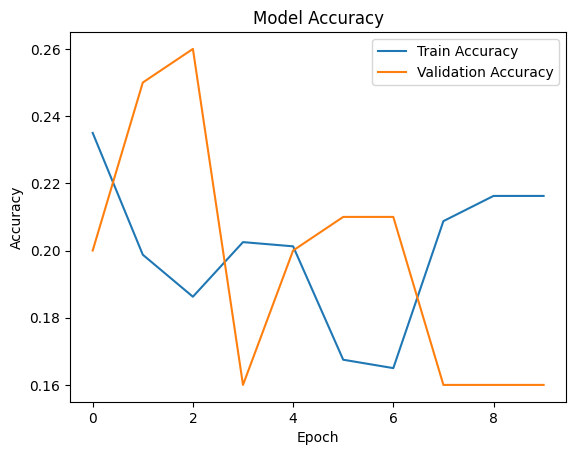

In [2]:
!pip install tensorflow

# Step 2: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import MobileNetV2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 3: Create a synthetic dataset
def create_synthetic_data(num_samples=1000):
    # Create synthetic images and labels
    images = []
    labels = []
    for i in range(num_samples):
        # Generate random images (224x224 RGB)
        img = np.random.rand(224, 224, 3) * 255
        images.append(img)

        # Randomly assign one of five skin disease labels (0-4)
        label = np.random.randint(0, 5)
        labels.append(label)

    return np.array(images), np.array(labels)

# Generate synthetic dataset
X, y = create_synthetic_data(num_samples=1000)

# Step 4: Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 5: Data augmentation
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Step 6: Load the MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Step 7: Create the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # 5 classes for skin diseases
])

# Step 8: Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 9: Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=10)  # Adjust epochs as needed

# Step 10: Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Step 11: Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.2121 - loss: 22.1402 - val_accuracy: 0.2100 - val_loss: 2.1507
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.1990 - loss: 2.7868 - val_accuracy: 0.1600 - val_loss: 1.8985
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.2037 - loss: 2.2357 - val_accuracy: 0.1500 - val_loss: 1.6158
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.2251 - loss: 1.6065 - val_accuracy: 0.1600 - val_loss: 1.6092
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.2265 - loss: 1.6091 - val_accuracy: 0.1600 - val_loss: 1.6093
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.2647 - loss: 1.6083 - val_accuracy: 0.1600 - val_loss: 1.6094
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.2286 - loss: 1.6085 - val_accuracy: 0.1600 - val_loss: 1.6095
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.2235 - loss: 1.6089 - val_accuracy: 0.1600 - val_loss

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


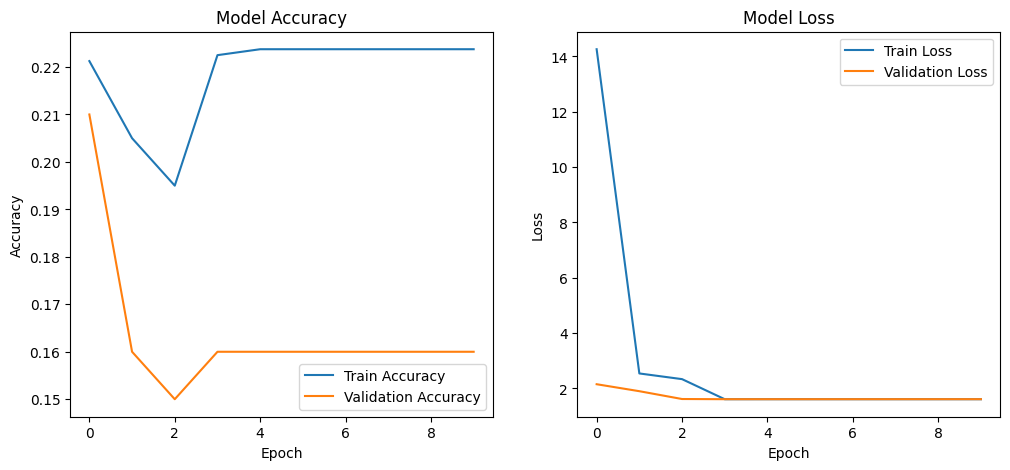

In [3]:
!pip install tensorflow

# Step 2: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import MobileNetV2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 3: Create a synthetic dataset
def create_synthetic_data(num_samples=1000):
    # Create synthetic images and labels
    images = []
    labels = []
    for i in range(num_samples):
        # Generate random images (224x224 RGB)
        img = np.random.rand(224, 224, 3) * 255
        images.append(img)

        # Randomly assign one of five skin disease labels (0-4)
        label = np.random.randint(0, 5)
        labels.append(label)

    return np.array(images), np.array(labels)

# Generate synthetic dataset
X, y = create_synthetic_data(num_samples=1000)

# Step 4: Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 5: Data augmentation
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Step 6: Load the MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Step 7: Create the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # 5 classes for skin diseases
])

# Step 8: Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 9: Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=10)  # Adjust epochs as needed

# Step 10: Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=-1)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 11: Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.2317 - loss: 35.8349 - val_accuracy: 0.1800 - val_loss: 2.8607
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.1934 - loss: 2.8330 - val_accuracy: 0.2700 - val_loss: 2.2609
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.1911 - loss: 2.2972 - val_accuracy: 0.1600 - val_loss: 1.8324
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.1832 - loss: 2.2656 - val_accuracy: 0.1800 - val_loss: 2.8151
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.2111 - loss: 2.3586 - val_accuracy: 0.2700 - val_loss: 1.7864
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.2041 - loss: 2.1247 - val_accuracy: 0.1700 - val_loss: 2.3472
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.1924 - loss: 2.4163 - val_accuracy: 0.2100 - val_loss: 3.4044
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.2022 - loss: 2.3252 - val_accuracy: 0.1900 - val_loss

3/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2s/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.10      1.00      0.18        10
           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        23

    accuracy                           0.10       100
   macro avg       0.02      0.20      0.04       100
weighted avg       0.01      0.10      0.02       100

Confusion Matrix:
[[10  0  0  0  0]
 [28  0  0  0  0]
 [19  0  0  0  0]
 [20  0  0  0  0]
 [23  0  0  0  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


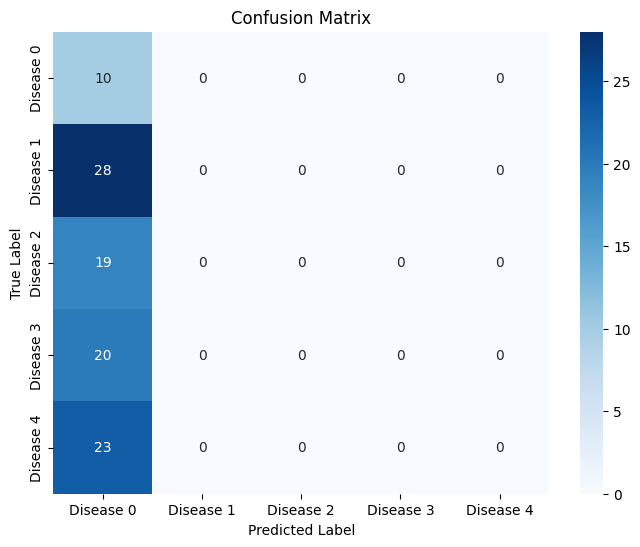

In [4]:
!pip install tensorflow

# Step 2: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import MobileNetV2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Step 3: Create a synthetic dataset
def create_synthetic_data(num_samples=1000):
    # Create synthetic images and labels
    images = []
    labels = []
    for i in range(num_samples):
        # Generate random images (224x224 RGB)
        img = np.random.rand(224, 224, 3) * 255
        images.append(img)

        # Randomly assign one of five skin disease labels (0-4)
        label = np.random.randint(0, 5)
        labels.append(label)

    return np.array(images), np.array(labels)

# Generate synthetic dataset
X, y = create_synthetic_data(num_samples=1000)

# Step 4: Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 5: Data augmentation
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Step 6: Load the MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Step 7: Create the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # 5 classes for skin diseases
])

# Step 8: Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 9: Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=10)  # Adjust epochs as needed

# Step 10: Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Step 11: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Disease {i}' for i in range(5)],
            yticklabels=[f'Disease {i}' for i in range(5)])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Saving image.jpeg to image.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


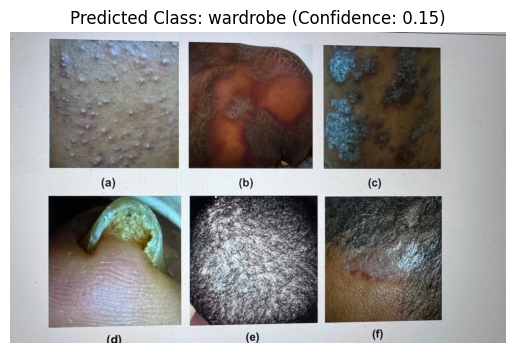

In [5]:
!pip install tensorflow

# Step 2: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from google.colab import files

# Step 3: Load the pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')

# Step 4: Function to predict the disease from an image
def predict_disease(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess for MobileNetV2

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=-1)[0]

    # Decode the predictions
    decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=3)[0]

    return predicted_class, decoded_predictions

# Step 5: Upload images
uploaded = files.upload()  # Upload your images

# Step 6: Predict and display results for each uploaded image
for image_name in uploaded.keys():
    predicted_class, decoded_predictions = predict_disease(image_name)

    # Display the image
    plt.figure()
    plt.imshow(load_img(image_name))
    plt.title(f'Predicted Class: {decoded_predictions[0][1]} (Confidence: {decoded_predictions[0][2]:.2f})')
    plt.axis('off')
    plt.show()